In [2]:
#importing All the libraries for Cleaning, Pre-processing, modeling and classification

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

from transformers import InputExample, InputFeatures
import tensorflow as tf
from bangla_stemmer.stemmer import stemmer
from sklearn.preprocessing import LabelEncoder
import banglanltk as bn


# data preprocessing
import banglanltk as bn
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
import re
from collections import Counter
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder


%matplotlib inline
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn import decomposition, ensemble
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer,TfidfTransformer
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.utils import shuffle
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score,KFold,GridSearchCV, train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from bangla_stemmer.stemmer import stemmer

In [3]:
#Importing Dataset

data = pd.read_csv('bangla_spam.csv')
data.head()

,type,text
0,spam,"প্রিয়,\t\t\t\t\t\t\t\t\nকানাডাতে IELTS ছাড়া ..."
1,spam,৳৯৯+অর্ডারে গিফট!\t\nকোডঃ 4V\t\nডিম৳১৩৯\t\nচাল...
2,spam,ফ্লোর ক্লিনার ১লিঃ৳১৪৯\t\nমাসের বাজারে ছাড়\t\n...
3,spam,ডিলে জাতীয় পতাকা৳৭১\t\nনগদ-এ ৳৭৫ক্যাশব্যাক\t\...
4,spam,সাশ্রয়ে ৩৪% পযর্ন্ত ছাড়ে\t\nডায়াপার চালডাল-এ\t...


In [4]:
#Initial Exploration (Data Clearning)

data.isnull().sum()
data.duplicated().sum()
data = data.drop_duplicates(keep='first')
data.head(5)

,type,text
0,spam,"প্রিয়,\t\t\t\t\t\t\t\t\nকানাডাতে IELTS ছাড়া ..."
1,spam,৳৯৯+অর্ডারে গিফট!\t\nকোডঃ 4V\t\nডিম৳১৩৯\t\nচাল...
2,spam,ফ্লোর ক্লিনার ১লিঃ৳১৪৯\t\nমাসের বাজারে ছাড়\t\n...
3,spam,ডিলে জাতীয় পতাকা৳৭১\t\nনগদ-এ ৳৭৫ক্যাশব্যাক\t\...
4,spam,সাশ্রয়ে ৩৪% পযর্ন্ত ছাড়ে\t\nডায়াপার চালডাল-এ\t...


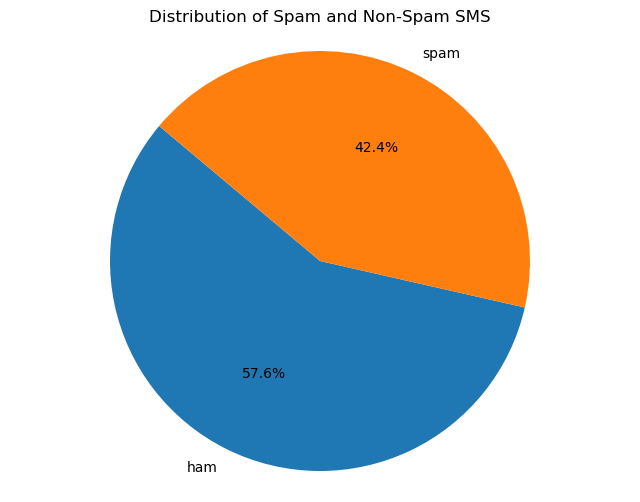

In [5]:
#Exploratory Data Analysis (EDA)

#1 data distribution
data['type'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
plt.pie(data['type'].value_counts(), labels=data['type'].value_counts().index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Spam and Non-Spam SMS')
plt.axis('equal') 
plt.show()

Average Length of Spam Emails: 110.59024390243903
Average Length of Ham Emails: 67.8021582733813


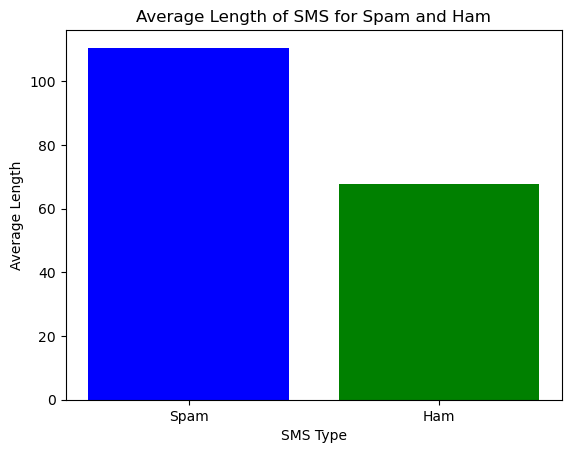

In [6]:
#2 average length of sms for spam and ham
data['Length'] = data['text'].apply(len)
data['num_words'] = data['text'].apply(word_tokenize).apply(len)
data['num_sentence'] = data['text'].apply(sent_tokenize).apply(len)
data.head(2)
avg_length_spam = data[data['type'] == 'spam']['Length'].mean()
avg_length_ham = data[data['type'] == 'ham']['Length'].mean()
#plotting
print("Average Length of Spam Emails:", avg_length_spam)
print("Average Length of Ham Emails:", avg_length_ham)
plt.bar(['Spam', 'Ham'], [avg_length_spam, avg_length_ham], color=['Blue', 'green'])
plt.title('Average Length of SMS for Spam and Ham')
plt.xlabel('SMS Type')
plt.ylabel('Average Length')
plt.show()

Average Words of Spam SMS: 19.497560975609755
Average Words of Ham SMS: 12.798561151079136


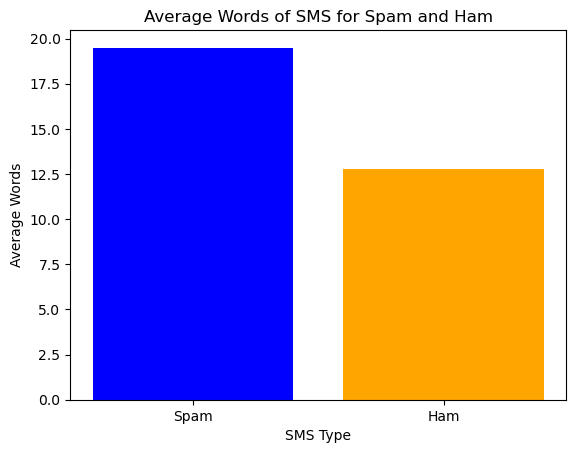

In [7]:
#3 Average Word of SMS for Spam and Ham

avg_word_spam = data[data['type'] == 'spam']['num_words'].mean()
avg_word_ham = data[data['type'] == 'ham']['num_words'].mean()
print("Average Words of Spam SMS:", avg_word_spam)
print("Average Words of Ham SMS:", avg_word_ham)

# Plotting the graph
plt.bar(['Spam', 'Ham'], [avg_word_spam, avg_word_ham], color=['Blue', 'orange'])
plt.title('Average Words of SMS for Spam and Ham')
plt.xlabel('SMS Type')
plt.ylabel('Average Words')
plt.show()

Average Sentence of Spam SMS: 1.3463414634146342
Average Sentence of Ham SMS: 1.1546762589928057


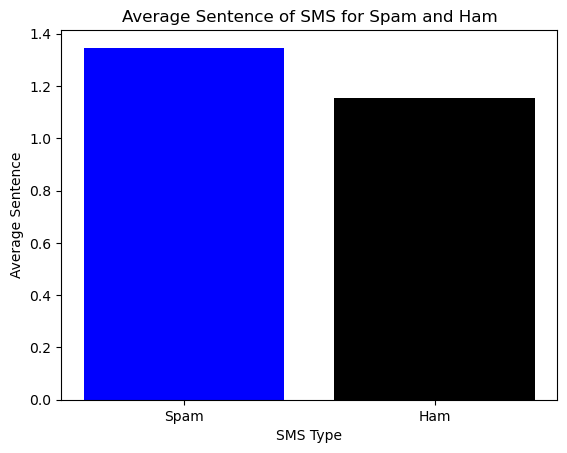

In [8]:
# 4- Average Sentence of SMS for Spam and Ham

avg_sentence_spam = data[data['type'] == 'spam']['num_sentence'].mean()
avg_sentence_ham = data[data['type'] == 'ham']['num_sentence'].mean()
print("Average Sentence of Spam SMS:", avg_sentence_spam)
print("Average Sentence of Ham SMS:", avg_sentence_ham)

# Plotting the graph
plt.bar(['Spam', 'Ham'], [avg_sentence_spam, avg_sentence_ham], color=['Blue', 'black'])
plt.title('Average Sentence of SMS for Spam and Ham')
plt.xlabel('SMS Type')
plt.ylabel('Average Sentence')
plt.show()

Correlation coefficient between SMS length and spam classification: 0.171409692375917


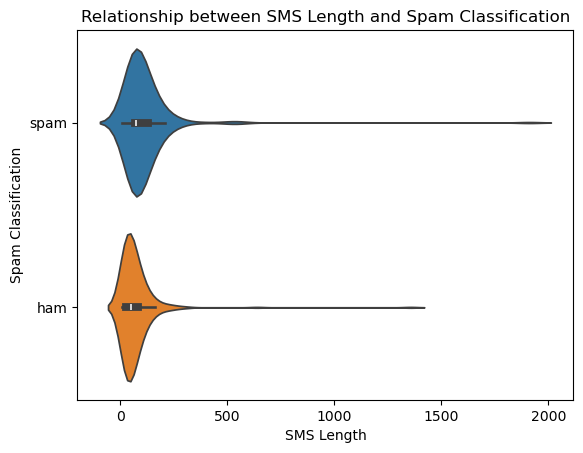

In [9]:
# 5- Relationship between Length and Spam
correlation = data['Length'].corr((data['type'] == 'spam').astype(int))
print("Correlation coefficient between SMS length and spam classification:", correlation)


sns.violinplot(data=data, x='Length', y='type', hue='type')
plt.xlabel('SMS Length')
plt.ylabel('Spam Classification')
plt.title('Relationship between SMS Length and Spam Classification')
plt.show()


The Relationship between Features are                  Length  num_words  num_sentence
Length        1.000000   0.990802      0.181260
num_words     0.990802   1.000000      0.192799
num_sentence  0.181260   0.192799      1.000000


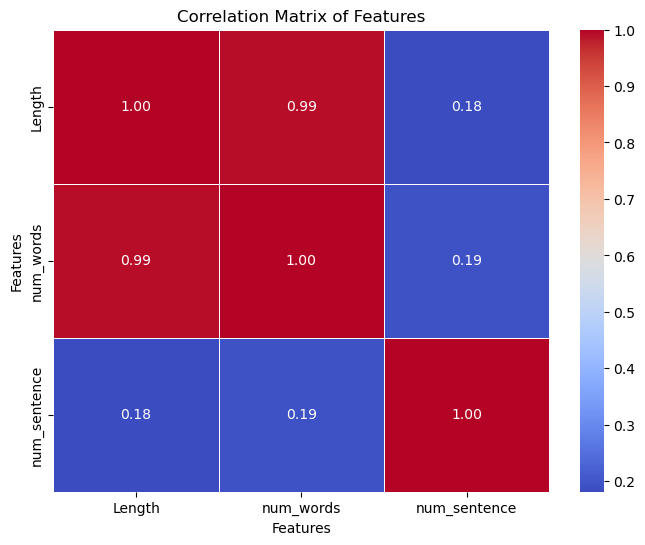

In [10]:
#6- Relationship between Features

correlation_matrix = data[['Length', 'num_words', 'num_sentence']].corr()
print("The Relationship between Features are ",correlation_matrix )
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Features')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

In [11]:
#Data Preprocessing


#cleaning text
data['transform_text'] = data['text'].apply(bn.clean_text)

# Tokenization
data['transform_text'] = data['transform_text'].apply(bn.word_tokenize)

# Stemming
stmr = stemmer.BanglaStemmer()
data['transform_text'] = data['transform_text'].apply(lambda x: [stmr.stem(word) for word in x])

#Convert the preprocessed text back to string
data['transform_text'] = data['transform_text'].apply(lambda x: ' '.join(x))


# Display the preprocessed data
print(data[['text', 'transform_text']].head())

applied first rules..
applied second rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied second rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied second rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..


In [34]:
#Removing Stopwords using bengali stopwords dataset
data1 =pd.read_excel('stopwords_bangla.xlsx')
stop = data1['words'].tolist()

def stopwordRemoval(text):    
    x=str(text)
    l=x.split()

    stm=[elem for elem in l if elem not in stop]
    
    out=' '.join(stm)
    
    return str(out)


data['transform_text'] = data['transform_text'].apply(stopwordRemoval)

# Display the preprocessed data
print(data[['text', 'transform_text']].head())

                                                text  \
0  প্রিয়,\t\t\t\t\t\t\t\t\nকানাডাতে IELTS ছাড়া ...   
1  ৳৯৯+অর্ডারে গিফট!\t\nকোডঃ 4V\t\nডিম৳১৩৯\t\nচাল...   
2  ফ্লোর ক্লিনার ১লিঃ৳১৪৯\t\nমাসের বাজারে ছাড়\t\n...   
3  ডিলে জাতীয় পতাকা৳৭১\t\nনগদ-এ ৳৭৫ক্যাশব্যাক\t\...   
4  সাশ্রয়ে ৩৪% পযর্ন্ত ছাড়ে\t\nডায়াপার চালডাল-এ\t...   

                                      transform_text  
0  প্রিয় কানাডা IELTS অ্যাপ্লা কর ২৬ স্টাডি স্লট...  
1  ৳৯৯+অর্ডারে গিফট কোডঃ 4V ডিম৳১৩৯ চাল৳৬১ তেল৳৮৯...  
2  ফ্লোর ক্লিন ১লিঃ৳১৪৯ মাস বাজারে ছাড় কোডCD2 TC ...  
3  ডিলে জাতীয় পতাকা৳৭১ নগদএ ৳৭৫ক্যাশব্যাক গিফট ক...  
4  সাশ্রয় ৩৪% পযর্ন্ত ছাড়ে ডায়া চালডালএ TC chdlco...  


In [12]:
#Most common words in SPAM SMS
spam_sms = data[data['type'] == 'spam']['transform_text']
spam_sms.head()
# Tokenize the text in spam sms
spam_words = ' '.join(spam_sms).split()
# Count occurrences of each word
word_counts = Counter(spam_words)
# Find the most common words
most_common_words = word_counts.most_common(10)
print("Top 10 Most Common Words in Spam SMS:")
for word, count in most_common_words:
    print(f"{word}: {count} occurrences")
    # Generate Word Cloud


Top 10 Most Common Words in Spam SMS:
করুন: 58 occurrences
টাকা: 37 occurrences
এর: 30 occurrences
অফ: 29 occurrences
ও: 28 occurrences
ডায়াল: 27 occurrences
করে: 27 occurrences
কর: 25 occurrences
পেত: 25 occurrences
নিন: 25 occurrences


In [13]:
#Most common words in HAM SMS
spam_sms = data[data['type'] == 'ham']['transform_text']
spam_sms.head()
# Tokenize the text in spam sms
spam_words = ' '.join(spam_sms).split()
# Count occurrences of each word
word_counts = Counter(spam_words)
# Find the most common words
most_common_words = word_counts.most_common(10)
print("Top 10 Most Common Words in Spam SMS:")
for word, count in most_common_words:
    print(f"{word}: {count} occurrences")
   

Top 10 Most Common Words in Spam SMS:
কর: 51 occurrences
না: 48 occurrences
আমি: 47 occurrences
আম: 44 occurrences
করে: 43 occurrences
হয়: 31 occurrences
আমা: 28 occurrences
টাকা: 27 occurrences
কি: 26 occurrences
থেক: 26 occurrences


In [14]:
#Model Building - Splitting data set into train and test data
encoder = LabelEncoder()
data['type'] = encoder.fit_transform(data['type'])
data.sample(2)

#data spliting and vectorization
tfidf = TfidfVectorizer(max_features=500)
X = tfidf.fit_transform(data['text']).toarray()
y = data['type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Splitting Data Set into Train data and Test data for model building")
print("X_train,y_train: ",X_train.shape,y_train.shape)
print("X_test,y_test: ",X_test.shape,y_test.shape)

Splitting Data Set into Train data and Test data for model building
X_train,y_train:  (386, 500) (386,)
X_test,y_test:  (97, 500) (97,)


In [17]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()

# Train the model
dt_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt_classifier.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt:.2f}")
print("Confusion Matrix:", confusion_matrix(y_test, y_pred_dt))
print("Precision Score:", precision_score(y_test, y_pred_dt))

Decision Tree Accuracy: 0.75
Confusion Matrix: [[49 14]
 [10 24]]
Precision Score: 0.631578947368421


In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Initialize the neural network model
nn_model = Sequential()

# Add input layer and first hidden layer
nn_model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
nn_model.add(Dropout(0.5))

# Add second hidden layer
nn_model.add(Dense(64, activation='relu'))
nn_model.add(Dropout(0.5))

# Add output layer
nn_model.add(Dense(1, activation='sigmoid'))

# Compile the model
nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
nn_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Predict on the test set
y_pred_nn = (nn_model.predict(X_test) > 0.5).astype("int32")

# Evaluate the model
accuracy_nn = accuracy_score(y_test, y_pred_nn)
print(f"Neural Network Accuracy: {accuracy_nn:.2f}")
print("Confusion Matrix:", confusion_matrix(y_test, y_pred_nn))
print("Precision Score:", precision_score(y_test, y_pred_nn))

Epoch 1/10


c:\Users\fahim\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.5833 - loss: 0.6880 - val_accuracy: 0.6598 - val_loss: 0.6796
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6346 - loss: 0.6742 - val_accuracy: 0.6598 - val_loss: 0.6664
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6461 - loss: 0.6600 - val_accuracy: 0.6804 - val_loss: 0.6506
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6770 - loss: 0.6316 - val_accuracy: 0.7216 - val_loss: 0.6263
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7321 - loss: 0.6102 - val_accuracy: 0.8144 - val_loss: 0.6015
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8653 - loss: 0.5523 - val_accuracy: 0.8351 - val_loss: 0.5565
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8946 - loss: 0.4798 - val_accuracy: 0.8351 - val_loss: 0.4996
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9234 - loss: 0.3798 - val_accuracy: 0.8454 - val_loss: 0.4481
Ep

In [19]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_knn = knn_classifier.predict(X_test)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn:.2f}")
print("Confusion Matrix:", confusion_matrix(y_test, y_pred_knn))
print("Precision Score:", precision_score(y_test, y_pred_knn))

KNN Accuracy: 0.70
Confusion Matrix: [[63  0]
 [29  5]]
Precision Score: 1.0


In [20]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
logreg_classifier = LogisticRegression()

# Train the model
logreg_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_logreg = logreg_classifier.predict(X_test)

# Evaluate the model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression Accuracy: {accuracy_logreg:.2f}")
print("Confusion Matrix:", confusion_matrix(y_test, y_pred_logreg))
print("Precision Score:", precision_score(y_test, y_pred_logreg))

Logistic Regression Accuracy: 0.82
Confusion Matrix: [[56  7]
 [10 24]]
Precision Score: 0.7741935483870968


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the Logistic Regression model
logreg_classifier = LogisticRegression()

# Train the model
logreg_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_logreg = logreg_classifier.predict(X_test)

# Evaluate the model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg)
recall_logreg = recall_score(y_test, y_pred_logreg)
f1_logreg = f1_score(y_test, y_pred_logreg)

print(f"Logistic Regression Accuracy: {accuracy_logreg:.2f}")
print(f"Logistic Regression Precision: {precision_logreg:.2f}")
print(f"Logistic Regression Recall: {recall_logreg:.2f}")
print(f"Logistic Regression F1 Score: {f1_logreg:.2f}")

Logistic Regression Accuracy: 0.82
Logistic Regression Precision: 0.77
Logistic Regression Recall: 0.71
Logistic Regression F1 Score: 0.74


In [23]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

svc_classifier = SVC()
svc_classifier.fit(X_train, y_train)
y_pred_svc = svc_classifier.predict(X_test)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print(f"SVM Accuracy: {accuracy_svc:.2f}")
print("confusion Matrix :",confusion_matrix(y_test,y_pred_svc))
print("Precision Score: ",precision_score(y_test,y_pred_svc))

SVM Accuracy: 0.86
confusion Matrix : [[56  7]
 [ 7 27]]
Precision Score:  0.7941176470588235


In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

# Tokenize the text data
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(data['transform_text'])
X = tokenizer.texts_to_sequences(data['transform_text'])

# Pad sequences to ensure uniform input size
X = pad_sequences(X, maxlen=100)

# Encode the labels
y = data['type']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the GRU model
gru_model = Sequential()

# Add embedding layer
gru_model.add(Embedding(input_dim=5000, output_dim=128, input_length=100))

# Add GRU layer
gru_model.add(GRU(128, return_sequences=True))
gru_model.add(Dropout(0.5))

# Add another GRU layer
gru_model.add(GRU(64))
gru_model.add(Dropout(0.5))

# Add output layer
gru_model.add(Dense(1, activation='sigmoid'))

# Compile the model
gru_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
gru_model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

# Predict on the test set
y_pred_gru = (gru_model.predict(X_test) > 0.5).astype("int32")

# Evaluate the model
accuracy_gru = accuracy_score(y_test, y_pred_gru)
print(f"GRU Accuracy: {accuracy_gru:.2f}")
print("Confusion Matrix:", confusion_matrix(y_test, y_pred_gru))
print("Precision Score:", precision_score(y_test, y_pred_gru))

Epoch 1/5


c:\Users\fahim\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


13/13 ━━━━━━━━━━━━━━━━━━━━ 16s 416ms/step - accuracy: 0.5874 - loss: 0.6793 - val_accuracy: 0.6907 - val_loss: 0.5428
Epoch 2/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 271ms/step - accuracy: 0.7127 - loss: 0.5413 - val_accuracy: 0.7938 - val_loss: 0.5115
Epoch 3/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 279ms/step - accuracy: 0.9477 - loss: 0.3425 - val_accuracy: 0.9072 - val_loss: 0.2912
Epoch 4/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 318ms/step - accuracy: 0.9564 - loss: 0.1523 - val_accuracy: 0.8763 - val_loss: 0.3838
Epoch 5/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 274ms/step - accuracy: 0.9902 - loss: 0.0507 - val_accuracy: 0.8866 - val_loss: 0.3270
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 406ms/step
GRU Accuracy: 0.89
Confusion Matrix: [[55  8]
 [ 3 31]]
Precision Score: 0.7948717948717948


In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

# Tokenize the text data
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(data['transform_text'])
X = tokenizer.texts_to_sequences(data['transform_text'])

# Pad sequences to ensure uniform input size
X = pad_sequences(X, maxlen=100)

# Encode the labels
y = data['type']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the LSTM model
lstm_model = Sequential()

# Add embedding layer
lstm_model.add(Embedding(input_dim=5000, output_dim=128, input_length=100))

# Add LSTM layer
lstm_model.add(LSTM(128, return_sequences=True))
lstm_model.add(Dropout(0.5))

# Add another LSTM layer
lstm_model.add(LSTM(64))
lstm_model.add(Dropout(0.5))

# Add output layer
lstm_model.add(Dense(1, activation='sigmoid'))

# Compile the model
lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
lstm_model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

# Predict on the test set
y_pred_lstm = (lstm_model.predict(X_test) > 0.5).astype("int32")

# Evaluate the model
accuracy_lstm = accuracy_score(y_test, y_pred_lstm)
print(f"LSTM Accuracy: {accuracy_lstm:.2f}")
print("Confusion Matrix:", confusion_matrix(y_test, y_pred_lstm))
print("Precision Score:", precision_score(y_test, y_pred_lstm))

Epoch 1/50


c:\Users\fahim\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


13/13 ━━━━━━━━━━━━━━━━━━━━ 12s 358ms/step - accuracy: 0.5745 - loss: 0.6768 - val_accuracy: 0.7113 - val_loss: 0.6007
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 225ms/step - accuracy: 0.7131 - loss: 0.6065 - val_accuracy: 0.6701 - val_loss: 0.5625
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 265ms/step - accuracy: 0.8065 - loss: 0.4590 - val_accuracy: 0.8247 - val_loss: 0.4039
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 309ms/step - accuracy: 0.9337 - loss: 0.2375 - val_accuracy: 0.8866 - val_loss: 0.2649
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 341ms/step - accuracy: 0.9691 - loss: 0.0966 - val_accuracy: 0.9175 - val_loss: 0.2479
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 317ms/step - accuracy: 0.9765 - loss: 0.0815 - val_accuracy: 0.8454 - val_loss: 0.3403
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 303ms/step - accuracy: 0.9838 - loss: 0.0549 - val_accuracy: 0.9175 - val_loss: 0.2517
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 329ms/step - accuracy: 0.9851 - loss: 0.0358 - val_accuracy: 0.9072 - val

In [35]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

# Initialize the Linear SVM model
linear_svc_classifier = LinearSVC()

# Train the model
linear_svc_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_linear_svc = linear_svc_classifier.predict(X_test)

# Evaluate the model
accuracy_linear_svc = accuracy_score(y_test, y_pred_linear_svc)
print(f"Linear SVM Accuracy: {accuracy_linear_svc:.2f}")
print("Confusion Matrix:", confusion_matrix(y_test, y_pred_linear_svc))
print("Precision Score:", precision_score(y_test, y_pred_linear_svc))

Linear SVM Accuracy: 0.58
Confusion Matrix: [[49 14]
 [27  7]]
Precision Score: 0.3333333333333333


c:\Users\fahim\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\fahim\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [52]:
import pickle

# Save the trained Linear SVM model to a file
with open('linear_svm_model.pkl', 'wb') as file:
    pickle.dump(linear_svc_classifier, file)

# Load the model from the file (for use in Streamlit or other applications)
with open('linear_svm_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)


In [64]:
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(linear_svc_classifier, open('linear_svm_model.pkl', 'wb'))